In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from sklearn.decomposition import PCA
from itertools import product

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

In [62]:
df_train = pd.read_csv("./Train_NOoutliers")
df_train = df_train.drop(columns=['Unnamed: 0'], axis = 1)
df_train = df_train.drop(columns=['outlier_detection'], axis = 1)
df_test = pd.read_csv("./Test_ripulito (1)")
df_test = df_test.drop(columns=['Unnamed: 0'], axis = 1)

In [63]:
encoder= LabelEncoder()
encoder.fit(df_train["emotion"])

keys= encoder.classes_
values= encoder.transform(encoder.classes_)
dictionary = dict(zip(keys, values))

df_train["emotion"]= encoder.transform(df_train["emotion"])
df_test["emotion"]= encoder.transform(df_test["emotion"])
y_train = df_train.emotion
df_train = df_train.drop(columns=['emotion', "filename"], axis = 1)
y_test = df_test.emotion
df_test = df_test.drop(columns=['emotion', "filename"], axis = 1)
dictionary

{'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fearful': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprised': 7}

In [64]:
df_train

,vocal_channel,emotional_intensity,statement,repetition,sex,sum,std,q25,q50,q75,...,sc_q25_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,normal,Kids are talking by the door,1st,M,0.145081,0.004001,-0.000031,0.0,0.000000,...,10439.979745,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,1.0,6.742190,-1.706215
1,speech,normal,Kids are talking by the door,2nd,M,0.114319,0.004283,-0.000031,0.0,0.000000,...,9721.736881,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,1.0,-0.700420,-0.201495
2,speech,normal,Dogs are sitting by the door,1st,M,0.149963,0.005084,0.000000,0.0,0.000000,...,9711.644575,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,1.0,1.688986,-1.024773
3,speech,normal,Dogs are sitting by the door,2nd,M,0.139618,0.004886,-0.000031,0.0,0.000000,...,8998.702287,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,1.0,-0.594111,-0.412871
4,speech,normal,Kids are talking by the door,1st,M,0.137665,0.002956,-0.000031,0.0,0.000000,...,9178.275961,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,speech,normal,Dogs are sitting by the door,2nd,F,-0.154480,0.005399,0.000000,0.0,0.000031,...,8504.050807,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,1.0,0.262900,-1.051814
1805,speech,strong,Kids are talking by the door,1st,F,-0.139679,0.008788,-0.000031,0.0,0.000031,...,7511.014887,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,1.0,-0.857759,-0.608583
1806,speech,strong,Kids are talking by the door,2nd,F,-0.210968,0.009933,0.000000,0.0,0.000031,...,7559.625245,2.505409,-1.472613,631.801688,0.634339,0.288322,0.000000,1.0,-0.656632,-0.586954
1807,speech,strong,Dogs are sitting by the door,1st,F,-0.085876,0.012221,-0.000031,0.0,0.000092,...,7603.873380,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,1.0,-0.499022,-0.849045


In [65]:
cols = [col for  col in df_train.columns[:5]]

for col in cols:
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])



In [66]:
df_train

,vocal_channel,emotional_intensity,statement,repetition,sex,sum,std,q25,q50,q75,...,sc_q25_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,1,0,1,0,1,0.145081,0.004001,-0.000031,0.0,0.000000,...,10439.979745,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,1.0,6.742190,-1.706215
1,1,0,1,1,1,0.114319,0.004283,-0.000031,0.0,0.000000,...,9721.736881,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,1.0,-0.700420,-0.201495
2,1,0,0,0,1,0.149963,0.005084,0.000000,0.0,0.000000,...,9711.644575,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,1.0,1.688986,-1.024773
3,1,0,0,1,1,0.139618,0.004886,-0.000031,0.0,0.000000,...,8998.702287,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,1.0,-0.594111,-0.412871
4,1,0,1,0,1,0.137665,0.002956,-0.000031,0.0,0.000000,...,9178.275961,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,1,0,0,1,0,-0.154480,0.005399,0.000000,0.0,0.000031,...,8504.050807,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,1.0,0.262900,-1.051814
1805,1,1,1,0,0,-0.139679,0.008788,-0.000031,0.0,0.000031,...,7511.014887,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,1.0,-0.857759,-0.608583
1806,1,1,1,1,0,-0.210968,0.009933,0.000000,0.0,0.000031,...,7559.625245,2.505409,-1.472613,631.801688,0.634339,0.288322,0.000000,1.0,-0.656632,-0.586954
1807,1,1,0,0,0,-0.085876,0.012221,-0.000031,0.0,0.000092,...,7603.873380,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,1.0,-0.499022,-0.849045


In [67]:
df_test

,vocal_channel,emotional_intensity,statement,repetition,sex,sum,std,q25,q50,q75,...,sc_q25_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,1,0,1,0,1,0.475616,0.003693,-0.000092,0.0,0.000153,...,8195.778271,-0.389589,-0.476916,727.157574,0.767044,0.169929,0.222808,1.0,-0.260279,-0.566556
1,1,0,1,1,1,0.120148,0.003508,-0.000122,0.0,0.000153,...,7170.967974,-1.261399,-0.396969,637.658102,0.699187,0.216928,0.114567,1.0,-0.428900,-0.587210
2,1,0,0,0,1,-0.599304,0.003363,-0.000061,0.0,0.000092,...,7466.224410,-0.548618,-0.212367,672.592436,0.709486,0.227178,0.010295,1.0,0.626916,-0.883317
3,1,0,0,1,1,-0.080383,0.004150,-0.000092,0.0,0.000122,...,7969.218641,-0.966908,0.173125,704.158385,0.752306,0.179467,0.241405,1.0,-0.825144,-0.383701
4,1,0,1,0,1,0.152222,0.001767,-0.000061,0.0,0.000122,...,8493.923917,2.327035,-1.593457,780.167518,0.747287,0.189124,0.217860,1.0,-0.536669,-0.547354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0,0,0,1,0,0.423157,0.014571,-0.001282,0.0,0.000763,...,7124.124853,-0.230367,-1.213402,791.637319,0.610831,0.301240,0.000496,1.0,-0.495689,-0.746055
620,0,1,1,0,0,-1.375854,0.025596,-0.001190,0.0,0.001007,...,4776.274447,-0.207094,0.289277,688.266594,0.536033,0.291831,0.002319,1.0,-0.877851,-0.152447
621,0,1,1,1,0,0.573761,0.026421,-0.001770,0.0,0.001038,...,5151.407589,-0.550877,-0.536569,619.688792,0.511294,0.297616,0.001602,1.0,-0.997740,-0.003013
622,0,1,0,0,0,0.792572,0.026456,-0.001709,0.0,0.000977,...,5306.555431,-0.646994,-0.421549,714.314900,0.595262,0.270272,0.006459,1.0,-0.670500,-0.325276


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train)
X_test = scaler.transform(df_test)

In [69]:
X_train

array([[ 0.83295872, -0.91973821,  1.00276779, ...,  0.02820272,
         9.94005507, -3.14742078],
       [ 0.83295872, -0.91973821,  1.00276779, ...,  0.02820272,
        -0.18096065,  0.45718156],
       [ 0.83295872, -0.91973821, -0.99723985, ...,  0.02820272,
         3.06833135, -1.51500604],
       ...,
       [ 0.83295872,  1.08726591,  1.00276779, ...,  0.02820272,
        -0.12141377, -0.46619787],
       [ 0.83295872,  1.08726591, -0.99723985, ...,  0.02820272,
         0.09291507, -1.09404334],
       [ 0.83295872,  1.08726591, -0.99723985, ...,  0.02820272,
        -0.53795854,  0.27746562]])

In [70]:
# make sure data are np.ndarray
y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [71]:
import warnings
warnings.filterwarnings("ignore")

Baseline NN (no regularization, no dropout, no early stopping)

In [72]:
#!pip install scikeras

In [73]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [74]:
n_classes = 8
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer="adam", metrics=['accuracy'])
    return model

In [75]:
model1 = build_model()
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               25984     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
Total params: 34,760
Trainable params: 34,760
Non-trainable params: 0
_________________________________________________________________


In [76]:
history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=200).history
#overfitting

Epoch 1/200
46/46 [==============================] - 1s 11ms/step - loss: 1.8021 - accuracy: 0.3096 - val_loss: 1.6684 - val_accuracy: 0.3564
Epoch 2/200
46/46 [==============================] - 0s 4ms/step - loss: 1.2950 - accuracy: 0.5238 - val_loss: 1.5363 - val_accuracy: 0.4254
Epoch 3/200
46/46 [==============================] - 0s 4ms/step - loss: 1.0291 - accuracy: 0.6296 - val_loss: 1.5120 - val_accuracy: 0.4309
Epoch 4/200
46/46 [==============================] - 0s 4ms/step - loss: 0.8386 - accuracy: 0.7167 - val_loss: 1.5686 - val_accuracy: 0.4227
Epoch 5/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.7802 - val_loss: 1.5717 - val_accuracy: 0.4503
Epoch 6/200
46/46 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.8258 - val_loss: 1.6836 - val_accuracy: 0.4392
Epoch 7/200
46/46 [==============================] - 0s 5ms/step - loss: 0.4715 - accuracy: 0.8659 - val_loss: 1.7560 - val_accuracy: 0.4420
Epoch 8/200


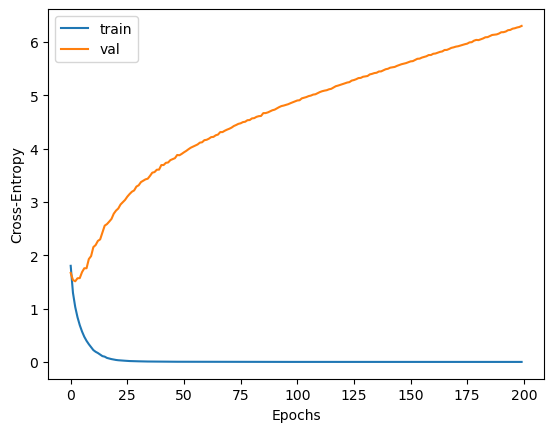

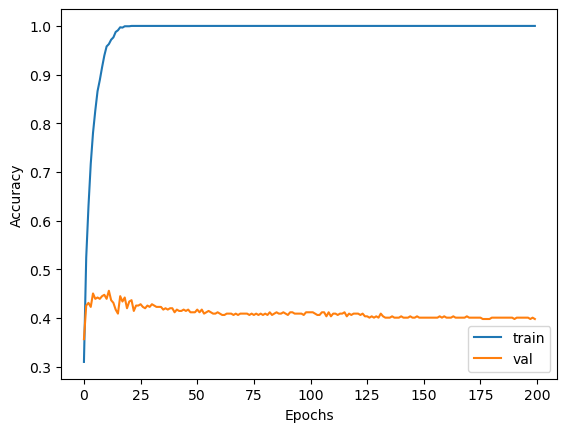

In [77]:
plt.plot(history1['loss'], label='train')
plt.plot(history1['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()
plt.plot(history1['accuracy'], label='train')
plt.plot(history1['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
print("LOSS: %f, ACCURACY: %f" % (test_loss1, test_acc1))

20/20 [==============================] - 0s 2ms/step - loss: 5.3351 - accuracy: 0.4888
LOSS: 5.335125, ACCURACY: 0.488782


Early Stopping (no regularization, no dropout)

In [79]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier

In [80]:
es = EarlyStopping(monitor='val_accuracy', patience=50, verbose=True)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_accuracy', save_best_only=True)

clf = KerasClassifier(build_model, callbacks=[es, mc])

In [81]:
clf.fit(X_train, y_train, validation_split=0.2)

46/46 [==============================] - 1s 19ms/step - loss: 1.8071 - accuracy: 0.2979 - val_loss: 1.6860 - val_accuracy: 0.3508


KerasClassifier(
	model=<function build_model at 0x000001F6CB910EE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x000001F6C91B68F0>, <keras.callbacks.ModelCheckpoint object at 0x000001F6CBB73CD0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [82]:
y_pred = clf.predict(X_test).astype(int)
print(classification_report(y_test, y_pred))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.46      0.64      0.53        96
           1       0.38      0.69      0.49        96
           2       0.48      0.46      0.47        48
           3       0.47      0.23      0.31        96
           4       0.34      0.28      0.31        96
           5       0.38      0.35      0.37        48
           6       0.38      0.16      0.22        96
           7       0.40      0.50      0.44        48

    accuracy                           0.41       624
   macro avg       0.41      0.41      0.39       624
weighted avg       0.41      0.41      0.38       624



In [84]:
#non userei questa parte, integrerei direttamente l'early stopping con le varie forme di regularization

L1 Regularization

In [87]:
from keras.regularizers import l2, l1

def build_L1_model():

    n_feature = X_train.shape[1]

    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_regularizer=l1()))
    model.add(Dense(64, activation='relu', kernel_regularizer=l1()))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer="adam", metrics=['accuracy'])
    return model

In [88]:
mc = ModelCheckpoint('best_model_L1.h5', monitor='val_accuracy', save_best_only=True)

L1_model = KerasClassifier(build_L1_model, callbacks=[es,mc])
L1_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
46/46 [==============================] - 1s 12ms/step - loss: 21.6471 - accuracy: 0.2661 - val_loss: 16.6275 - val_accuracy: 0.3425
Epoch 2/500
46/46 [==============================] - 0s 7ms/step - loss: 12.7324 - accuracy: 0.3780 - val_loss: 9.1608 - val_accuracy: 0.3895
Epoch 3/500
46/46 [==============================] - 0s 4ms/step - loss: 6.6372 - accuracy: 0.3939 - val_loss: 4.6282 - val_accuracy: 0.3674
Epoch 4/500
46/46 [==============================] - 0s 5ms/step - loss: 3.5195 - accuracy: 0.3601 - val_loss: 2.8406 - val_accuracy: 0.3619
Epoch 5/500
46/46 [==============================] - 0s 4ms/step - loss: 2.4762 - accuracy: 0.3414 - val_loss: 2.3059 - val_accuracy: 0.3287
Epoch 6/500
46/46 [==============================] - 0s 4ms/step - loss: 2.1326 - accuracy: 0.3276 - val_loss: 2.0974 - val_accuracy: 0.3619
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 1.9899 - accuracy: 0.3338 - val_loss: 2.0099 - val_accuracy: 0.3508
Epoch 8/5

KerasClassifier(
	model=<function build_L2_model at 0x000001F6C50BD870>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x000001F6C91B68F0>, <keras.callbacks.ModelCheckpoint object at 0x000001F6CA5954E0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

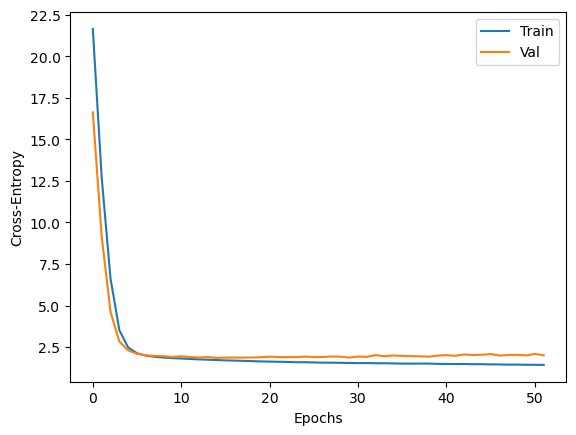

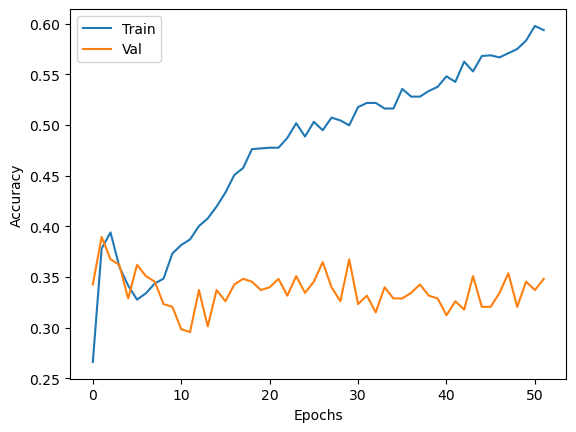

In [90]:
history = L1_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

L2 Regularization

In [91]:
def build_L2_model():

    n_feature = X_train.shape[1]

    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_regularizer=l2()))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2()))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer="adam", metrics=['accuracy'])
    return model

In [93]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)

L2_model = KerasClassifier(build_L2_model, callbacks=[es,mc])
L2_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
46/46 [==============================] - 1s 20ms/step - loss: 4.0464 - accuracy: 0.2909 - val_loss: 3.7224 - val_accuracy: 0.3840
Epoch 2/500
46/46 [==============================] - 0s 6ms/step - loss: 3.2302 - accuracy: 0.5328 - val_loss: 3.2733 - val_accuracy: 0.4033
Epoch 3/500
46/46 [==============================] - 0s 6ms/step - loss: 2.7349 - accuracy: 0.6137 - val_loss: 2.9350 - val_accuracy: 0.4503
Epoch 4/500
46/46 [==============================] - 0s 5ms/step - loss: 2.3623 - accuracy: 0.6966 - val_loss: 2.7706 - val_accuracy: 0.4641
Epoch 5/500
46/46 [==============================] - 0s 4ms/step - loss: 2.0686 - accuracy: 0.7457 - val_loss: 2.6279 - val_accuracy: 0.4558
Epoch 6/500
46/46 [==============================] - 0s 4ms/step - loss: 1.8378 - accuracy: 0.7802 - val_loss: 2.5161 - val_accuracy: 0.4337
Epoch 7/500
46/46 [==============================] - 0s 7ms/step - loss: 1.6538 - accuracy: 0.8023 - val_loss: 2.4187 - val_accuracy: 0.4834
Epoch 8/500


KerasClassifier(
	model=<function build_L2_model at 0x000001F6CB912710>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x000001F6C91B68F0>, <keras.callbacks.ModelCheckpoint object at 0x000001F6CC0696C0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

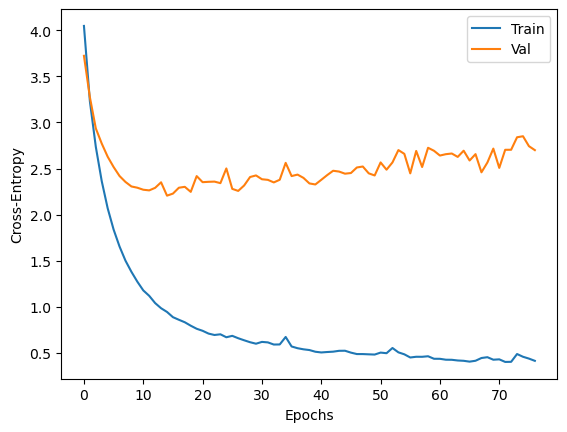

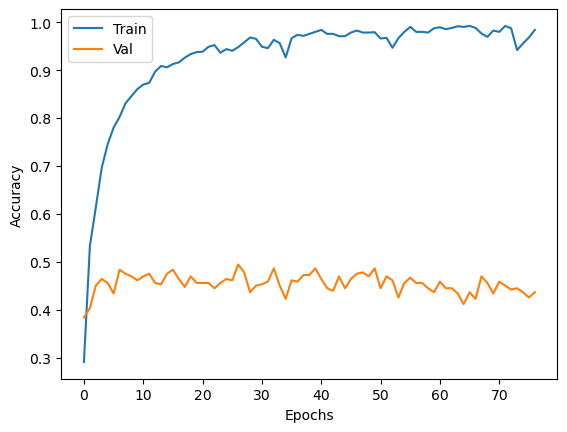

In [94]:
history = L2_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Dropout

In [96]:
from keras.layers import Dropout

def build_DROPOUT_model():
    n_feature = X_train.shape[1]

    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer="adam", metrics=['accuracy'])
    return model

In [97]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

DROPOUT_model = KerasClassifier(build_DROPOUT_model, callbacks=[es,mc])
DROPOUT_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
46/46 [==============================] - 2s 18ms/step - loss: 1.8860 - accuracy: 0.2909 - val_loss: 1.7954 - val_accuracy: 0.3481
Epoch 2/500
46/46 [==============================] - 0s 8ms/step - loss: 1.4505 - accuracy: 0.4506 - val_loss: 1.6657 - val_accuracy: 0.3895
Epoch 3/500
46/46 [==============================] - 0s 7ms/step - loss: 1.2440 - accuracy: 0.5404 - val_loss: 1.5846 - val_accuracy: 0.4144
Epoch 4/500
46/46 [==============================] - 0s 5ms/step - loss: 1.0545 - accuracy: 0.6158 - val_loss: 1.6113 - val_accuracy: 0.4199
Epoch 5/500
46/46 [==============================] - 0s 7ms/step - loss: 0.9078 - accuracy: 0.6648 - val_loss: 1.6290 - val_accuracy: 0.4613
Epoch 6/500
46/46 [==============================] - 0s 4ms/step - loss: 0.7890 - accuracy: 0.7277 - val_loss: 1.6926 - val_accuracy: 0.4227
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 0.7358 - accuracy: 0.7450 - val_loss: 1.6667 - val_accuracy: 0.4613
Epoch 8/500


KerasClassifier(
	model=<function build_DROPOUT_model at 0x000001F6CF1F6950>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x000001F6C91B68F0>, <keras.callbacks.ModelCheckpoint object at 0x000001F6CE94DC30>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

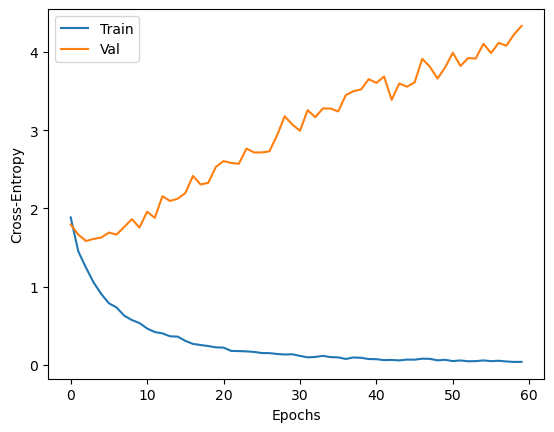

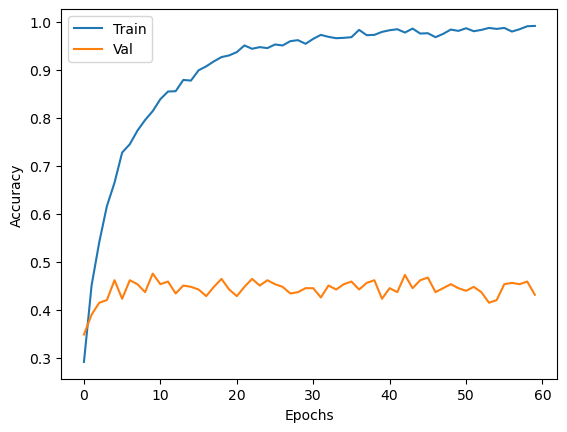

In [98]:
history = DROPOUT_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model comparison

In [101]:
# load best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L1_model = load_model('best_model_L1.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L1, acc_L1 = best_L1_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 1.6234 - accuracy: 0.5016


In [105]:
print('No Regularization:')
print('Loss %f, Accuracy %f\n' % (loss_NOREG, acc_NOREG))
print('L1 Regularization')
print('Loss %f, Accuracy %f\n' % (loss_L1, acc_L1))
print('L2 Regularization')
print('Loss %f, Accuracy %f\n' % (loss_L2, acc_L2))
print('Dropout')
print('Loss %f, Accuracy %f\n' % (loss_DROPOUT, acc_DROPOUT))

No Regularization:
Loss 1.619174, Accuracy 0.407051

L1 Regularization
Loss 9.093538, Accuracy 0.379808

L2 Regularization
Loss 2.162890, Accuracy 0.487179

Dropout
Loss 1.623398, Accuracy 0.501603



Hyperparameter Tuning

In [106]:
def build_model(meta, hidden_layer_sizes, activation):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    return model

In [107]:
clf = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False
)

In [108]:
params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__hidden_layer_sizes': [(100, 100, 100), (50, 50, 50), (10, 10, 10), 
                                  (100, 50, 10), (10, 10, 10), (10, 10)],
    'model__activation': ['relu', 'tanh'],
    'optimizer': ["adam", "sgd"],
    'epochs': [10, 50, 100, 200]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', n_jobs=-1, verbose=True, n_iter=15, cv=5)

In [109]:
gs.fit(X_train, y_train)
print(gs.best_score_, gs.best_params_, '\n')

y_pred = gs.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.4743055661835601 {'optimizer__learning_rate': 0.001, 'optimizer': 'adam', 'model__hidden_layer_sizes': (10, 10), 'model__activation': 'relu', 'epochs': 50} 

Accuracy 0.49198717948717946
F1-score [0.6784141  0.56565657 0.5511811  0.45859873 0.37696335 0.43859649
 0.30555556 0.44444444]
              precision    recall  f1-score   support

           0       0.59      0.80      0.68        96
           1       0.55      0.58      0.57        96
           2       0.44      0.73      0.55        48
           3       0.59      0.38      0.46        96
           4       0.38      0.38      0.38        96
           5       0.38      0.52      0.44        48
           6       0.46      0.23      0.31        96
           7       0.48      0.42      0.44        48

    accuracy                           0.49       624
   macro avg       0.48      0.50      0.48       624
weighted avg       0.49      0.49      0.48       624
